# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [ ]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Rebecca Jacoby"
__contact__   = "rebecca.jacoby@ndus.edu"

### IMPORT REQUIRED LIBRARIES ###

In [9]:
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### OPEN NETCDF FILE ###

In [25]:
data = Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation
let = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
time = data.variables['time'][:] #hours since 1900-01-01 00:00:0.0


start_time = datetime(1900,1,1,0,0)
dts = np.empty(len(time), dtype=datetime)
for index, t in enumerate(time):
    dts[index] = start_time + timedelta(hours=int(t))
    
tp = data.variables['tp'][:]*1000
p10u = data.variables['p10u'][:]
p10v = data.variables['p10v'][:]
msl = data.variables['msl'][:]/100





1900-01-01 00:00:00


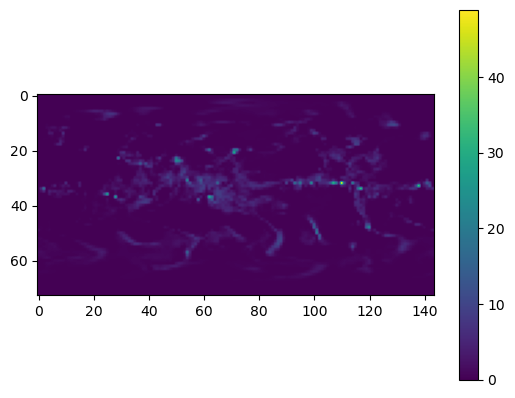

In [16]:
plt.imshow(tp[7])
plt.colorbar()
plt.show()




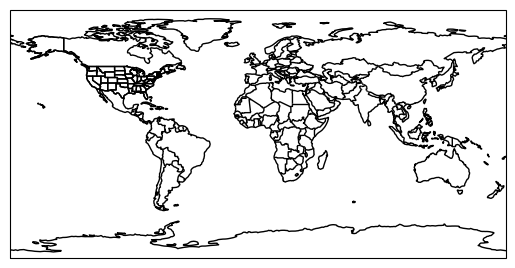

<Figure size 1000x1000 with 0 Axes>

In [28]:
ax = plt.axes(projection=ccrs.PlateCarree())

fig = plt.figure(figsize=(10,10),dpi=100)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)



plt.contour(msl)
plt.contour(tp)
plt.contour(p10u)
plt.contour(p10v)   #60, transform=ccrs.PlateCarree())












#contour for pressure: 4mb step, with 1000mb baseline
#precip: 1-25 by 1
#contour for winds